# Analysis of IHC-stained imaging data

This tutorial will guide you through the process of running SpaHDmap on IHC stained image ST data. Please see the [Step-by-step guide for SpaHDmap workflow](./HE-image.ipynb) tutorial for a more comprehensive introduction to SpaHDmap.

Our example data is a 10X Visium ST dataset MBC-01 sequenced from an adult mouse brain coronal section, comprising three immunohistochemistry (IHC) stained images (DAPI, Anti-GFAP, Anti-NeuN), we will take the IHC image and the spot expression data as input to run SpaHDmap. This data could be downloaded from [10X Genomics](https://www.10xgenomics.com/datasets/adult-mouse-brain-section-2-coronal-stains-dapi-anti-gfap-anti-neu-n-1-standard-1-1-0) or [Google Drive](https://drive.google.com/file/d/1CL0g8QSE-VOKRgjIJJQJFpO3tw4oX30E/view?usp=drive_link).

## 1. Import necessary libraries

In [2]:
import torch
import numpy as np
import scanpy as sc

import SpaHDmap as hdmap

/home/qk/anaconda3/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


## 2. Set the parameters and paths

In this section, we will set the parameters and paths for the SpaHDmap model, including:

**Parameters**:
- `rank`: the rank / number of components of the NMF model
- `seed`: the random seed
- `verbose`: whether to print the log information

**Paths**:
- `root_path`: the root path of the experiment
- `project`: the name of the project
- `results_path`: the path to save the results

### Parameters settings

By default, we set the `rank` to 20, the `seed` to 123, and the `verbose` to True. You can modify the parameters according to your data.

In [3]:
rank = 20
seed = 123
verbose = True

np.random.seed(seed)
torch.manual_seed(seed)

### Paths settings

These paths are set with respect to the current directory. You can modify the paths according to your data.

In [4]:
root_path = '../experiments/'
project = 'MBC01'

results_path = f'{root_path}/{project}/Results_Rank{rank}/'

## 3. Load the data and pre-process

The data used in this tutorial is a 10X Visium ST dataset MBC-01 sequenced from an adult mouse brain coronal section, could be downloaded from [10X Genomics](https://www.10xgenomics.com/datasets/adult-mouse-brain-section-2-coronal-stains-dapi-anti-gfap-anti-neu-n-1-standard-1-1-0) or [Google Drive](https://drive.google.com/file/d/1CL0g8QSE-VOKRgjIJJQJFpO3tw4oX30E/view?usp=drive_link).

Next, we download the data from 10X Genomics using scanpy.

In [5]:
section_id = 'V1_Adult_Mouse_Brain_Coronal_Section_2'

# Download the data from the 10X website (set include_hires_tiff=True to download the hires image)
adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)
image_path = adata.uns["spatial"][section_id]["metadata"]["source_image_path"]

# or load the data from a local folder
# adata = sc.read_visium(f'data/{section_id}')
# image_path = f'data/{section_id}/image.tif'

/tmp/ipykernel_1235441/3088077163.py:4: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)


  0%|          | 0.00/5.88M [00:00<?, ?B/s]

  0%|          | 0.00/15.0M [00:00<?, ?B/s]

  0%|          | 0.00/3.28G [00:00<?, ?B/s]

/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Then we can load and preprocess the data.

In [6]:
# Load the data from an AnnData object
mouse_cortex = hdmap.prepare_stdata(adata=adata, section_name='mouse_cortex', image_path=image_path)

hdmap.select_svgs(mouse_cortex, n_top_genes=3000)

*** Reading and preparing AnnData for section mouse_cortex ***
Spot radius found in AnnData: 89
Pre-processing gene expression data for 2807 spots and 32285 genes.
Swapping x and y coordinates.
Processing image, seems to be Immunofluorescence image.
Selected 3000 SVGs using moran method.


In [7]:
mouse_cortex

STData object for section: mouse_cortex
Number of spots: 2807
Number of genes: 3000
Image shape: (3, 24240, 24240)
Scale rate: 1
Spot radius: 89
Image type: Immunofluorescence
Available scores: 

## 4. Run SpaHDmap

Same to case of analyzing H&E-image 10X Visium ST data, we initialize the Mapper object and run SpaHDmap.

In [8]:
# Initialize the SpaHDmap runner
mapper = hdmap.Mapper(mouse_cortex, results_path=results_path, verbose=True)

# Run SpaHDmap in one function
mapper.run_SpaHDmap()

*** Preparing the tissue splits and creating pseudo spots... ***
*** Single section detected. Using its 3000 genes. ***
*** The split size is set to 256 pixels. ***
For section mouse_cortex, divide the tissue into 4495 sub-tissues, and create 15000 pseudo spots.
*** Using GPU ***
Step 1: Run NMF
*** Performing NMF... ***
*** Visualizing and saving the embeddings of NMF... ***
Step 2: Pre-train the SpaHDmap model
*** Pre-trained model found at ../experiments//MBC01/Results_Rank20//models//pretrained_model.pth, loading... ***
Step 3: Train the GCN model
*** Performing GCN... ***
*** Training GCN for mouse_cortex... ***
[Iter: 200 / 5000], Loss: 0.018455, Learning rate: 4.985215e-03
[Iter: 400 / 5000], Loss: 0.005902, Learning rate: 4.941093e-03
[Iter: 600 / 5000], Loss: 0.005357, Learning rate: 4.868331e-03
[Iter: 800 / 5000], Loss: 0.005235, Learning rate: 4.768075e-03
[Iter: 1000 / 5000], Loss: 0.005175, Learning rate: 4.641907e-03
[Iter: 1200 / 5000], Loss: 0.005133, Learning rate: 4.

After training, NMF, GCN and SpaHDmap scores are available now.

In [9]:
mouse_cortex

STData object for section: mouse_cortex
Number of spots: 2807
Number of genes: 3000
Image shape: (3, 24240, 24240)
Scale rate: 1
Spot radius: 89
Image type: Immunofluorescence
Available scores: NMF, GCN, VD, SpaHDmap, SpaHDmap_spot

*** Visualizing and saving the embeddings of NMF... ***


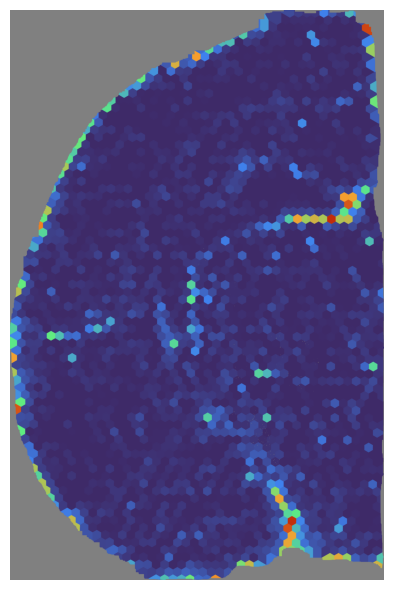

In [10]:
# Visualize the NMF score
mapper.visualize(mouse_cortex, use_score='NMF', index=18)

*** Visualizing and saving the embeddings of GCN... ***


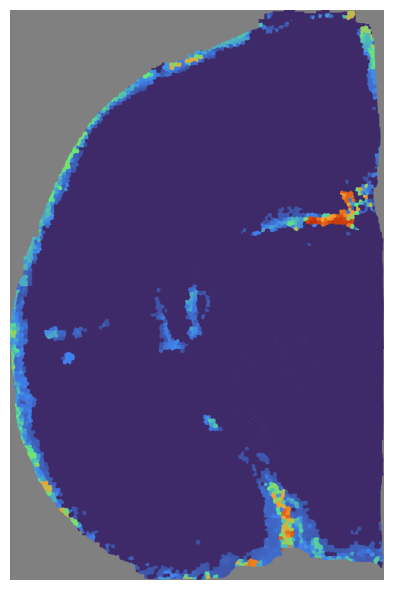

In [11]:
# Visualize the GCN score
mapper.visualize(mouse_cortex, use_score='GCN', index=18)

*** Visualizing and saving the embeddings of SpaHDmap... ***


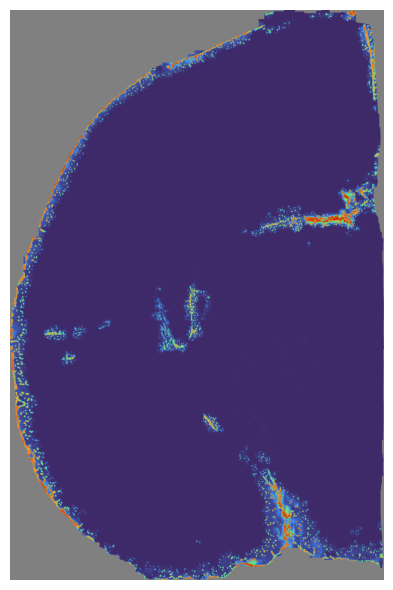

In [12]:
# Visualize the SpaHDmap score
mapper.visualize(mouse_cortex, use_score='SpaHDmap', index=18)

The final metagene matrix is stored in the `metagene` attribute of the Mapper object.

In [13]:
mapper.metagene.head()

,Embedding_1,Embedding_2,Embedding_3,Embedding_4,Embedding_5,Embedding_6,Embedding_7,Embedding_8,Embedding_9,Embedding_10,Embedding_11,Embedding_12,Embedding_13,Embedding_14,Embedding_15,Embedding_16,Embedding_17,Embedding_18,Embedding_19,Embedding_20
Ttr,0.653175,1.833360,1.759959,0.863542,0.635973,0.796727,1.724082,10.820923,0.743422,0.190398,4.749407,2.004940,2.177563,0.056810,1.462872,0.241082,1.046943,0.373725,0.430738,0.987345
Pmch,0.000000,0.134814,0.725159,4.474846,0.000000,0.284629,0.261490,0.288069,0.000000,0.120419,0.147249,0.000000,0.077970,0.000000,0.188201,0.000000,0.181804,0.231371,0.141038,0.608212
Nrgn,0.920033,1.430566,1.030315,1.025843,0.000000,2.993280,1.609028,0.361755,0.413251,3.758653,1.467950,0.440135,1.782942,1.484033,2.550623,1.692670,3.061066,2.685826,1.156759,0.290362
Mbp,0.261881,6.488406,3.927031,2.893169,0.787206,1.605631,2.251450,1.506694,0.748659,1.882908,2.831253,3.457766,1.625117,3.343159,2.528405,2.594703,2.560298,1.524600,1.682140,3.647867
Prkcd,0.089541,0.355763,3.671064,0.001683,0.100243,0.286054,0.074247,0.149027,0.076787,0.000000,0.084735,1.190819,0.000000,0.208558,0.000000,0.322872,0.547407,0.000000,0.305845,0.579738


Finally, we can save the STData object:

In [14]:
mouse_cortex.save(results_path + 'mouse_cortex.st')